In [32]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv('Diabetes(in).csv')
df.head()

,Pragnency,Glucose,Blod Pressure,Skin Thikness,Insulin,BMI,DFP,Age,Diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
x = df[['Glucose','Age']]
y = df.Diabetes

In [5]:
x.head()

,Glucose,Age
0,85,31
1,183,32
2,89,21
3,137,33
4,116,30


In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 5)

In [7]:
dmodel = DecisionTreeClassifier()
dmodel.fit(xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
# prediction 
# Evaluation
# view tree

In [9]:
# 85 , 31

In [10]:
# prediction


In [11]:
dmodel.predict([[81,31]])

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [12]:
dmodel.predict([[183,32]])

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [13]:
df.isnull().sum()

Pragnency        0
Glucose          0
Blod Pressure    0
Skin Thikness    0
Insulin          0
BMI              0
DFP              0
Age              0
Diabetes         0
dtype: int64

In [14]:
# Evaluation

In [15]:
yprediction = dmodel.predict(xtest)

In [16]:
yprediction

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [17]:
accuracy = accuracy_score(ytest, yprediction)
print(f'Accuracy:{accuracy: .2%}')

Accuracy: 68.18%


In [18]:
# view tree

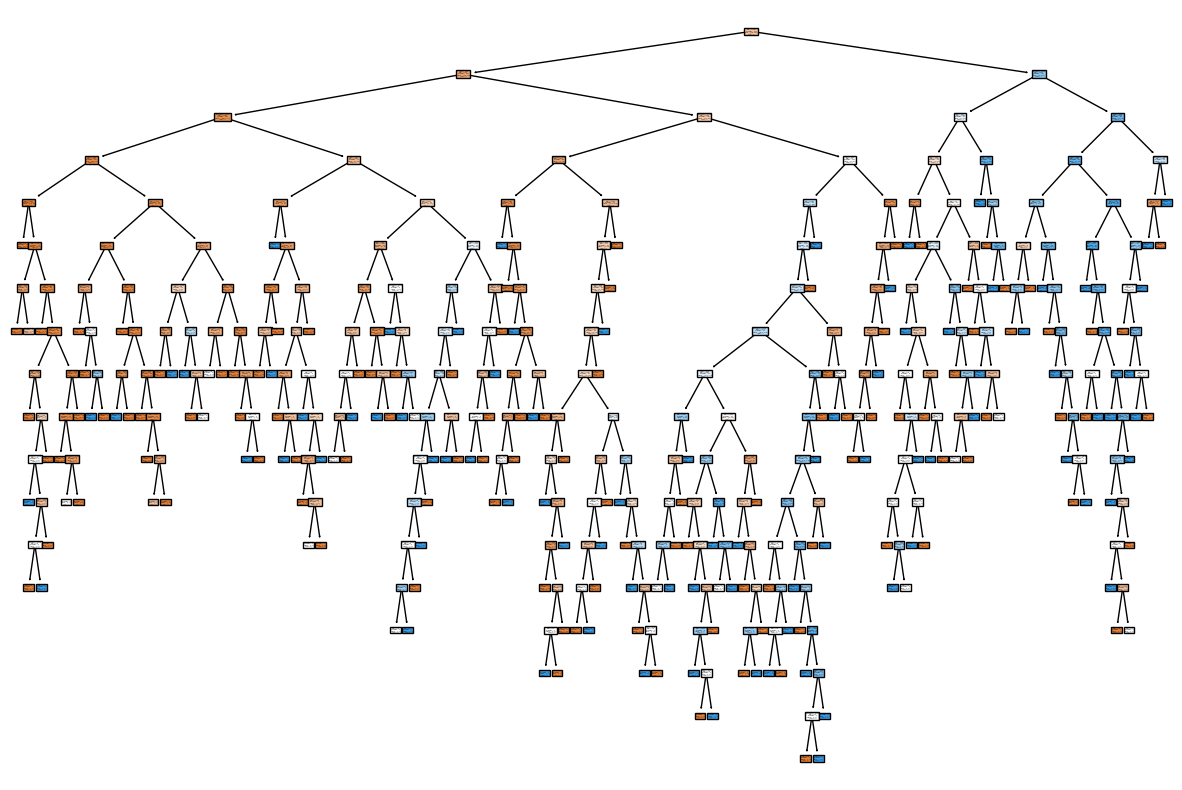

In [19]:
plt.figure(figsize = (15,10))
plot_tree(dmodel, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.show()

In [20]:
# accuracy using training data


In [21]:
ypred_train = dmodel.predict(xtrain)

In [22]:

acc_train = accuracy_score(ytrain, ypred_train)
print(f'Training Accuracy:{acc_train: .2%}')

Training Accuracy: 97.55%


1. Low accuracy in testing And high accuracy in training ==> Overfitting
2. Low accuracy in testing And low accuracy in training ==> underfitting

In [23]:
# to see parameters 
dmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

1. 'max_depth': None,
2. 'max_leaf_nodes': None,
3. 'min_samples_leaf': 1,
4. 'min_samples_split': 2

In [24]:
dmodel_2 = DecisionTreeClassifier(max_depth = 7)
dmodel_2.fit(xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


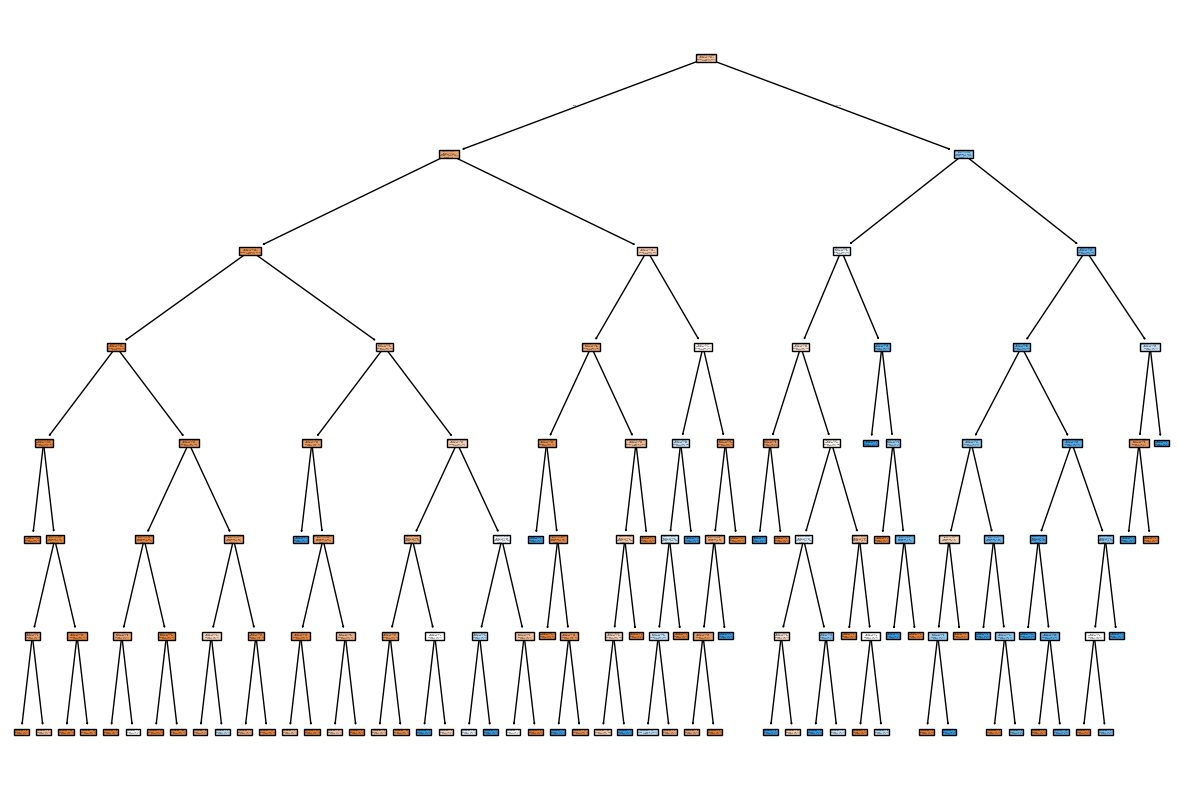

In [25]:
plt.figure(figsize = (15,10))
plot_tree(dmodel_2, feature_names=x.columns, class_names=['0','1'], filled=True) # class name chai string nai hunu parxa
plt.show()

In [26]:
yprediction_2 = dmodel_2.predict(xtest)

In [27]:
accuracy = accuracy_score(ytest, yprediction_2)
print(f'Accuracy:{accuracy: .2%}')

Accuracy: 65.58%


In [28]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(
 |      *,
 |      criterion='gini',
 |      splitter='best',
 |      max_depth=None,
 |      min_samples_split=2,
 |      min_samples_leaf=1,
 |      min_weight_fraction_leaf=0.0,
 |      max_features=None,
 |      random_state=None,
 |      max_leaf_nodes=None,
 |      min_impurity_decrease=0.0,
 |      class_weight=None,
 |      ccp_alpha=0.0,
 |      monotonic_cst=None
 |  )
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best",

In [29]:
for i in [4, 5, 6, 7]:
    dmodel = DecisionTreeClassifier(max_depth = i)

- Parameter ==> That model learns
- Hyperparameter ==> that model doesn't learn , set ownself

In [30]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {
    
}